In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from datetime import datetime

plt.rcParams['axes.grid'] = False 
plt.rcParams["figure.figsize"]=(14,4)

import FinanceDataReader as fdr

In [2]:
df = fdr.StockListing('NASDAQ')
nasdaq100_namelist = dict()

with open('../data/price/NASDAQ100_Index.txt','r') as f:
    symbol = f.read().split('\n')

100%|██████████| 3937/3937 [00:06<00:00, 610.62it/s]


In [4]:
def find_stock_data(symbol):
    return fdr.DataReader(symbol,'2015-01-01', '2020-12-31').reset_index().sort_values(by='Date')

In [5]:
def plot_stock(df,stock_name):
    plt.rcParams["figure.figsize"]=(20,10)
    plt.title(stock_name+' closing price')
    plt.plot(df['Date'], df['Close'])
    plt.show()

/home/nayeon212/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/nayeon212/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/nayeon212/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


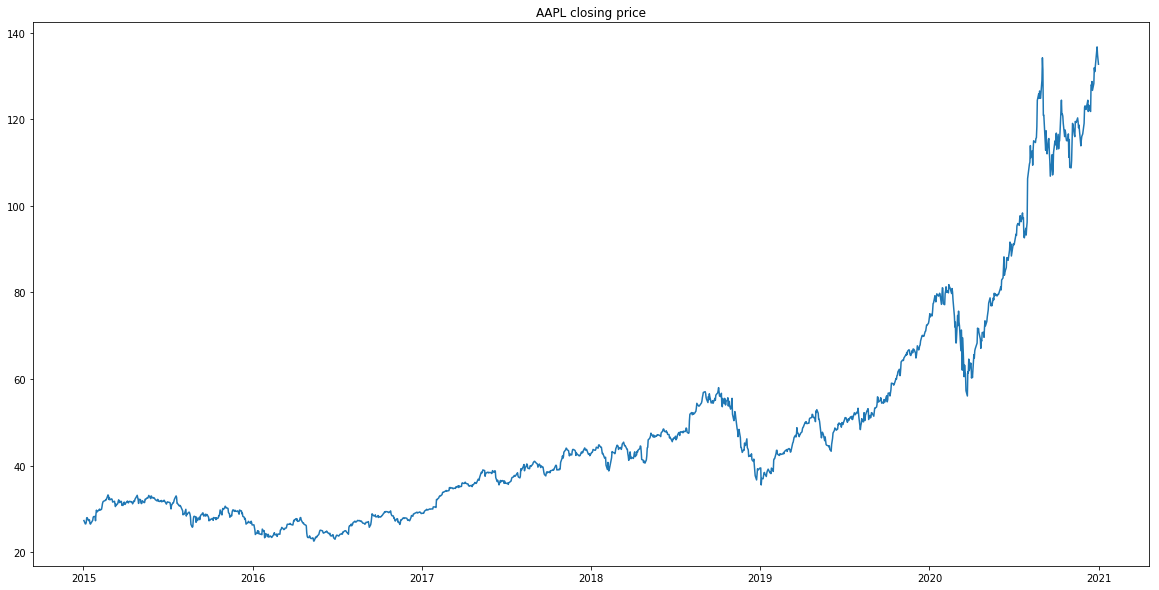

In [6]:
df = find_stock_data('AAPL')
plot_stock(df,'AAPL')
before = df.loc[:len(df)-2]
after = df.loc[1:][['Close','Open','High','Low',]]
after['sub'] = np.array(after['Close']) - np.array(before['Close'])
after['Close'] = np.array(after['Close']) / np.array(before['Close']) - 1
after['Open'] = np.array(after['Open']) / np.array(before['Close']) - 1
after['High'] = np.array(after['High'])/ np.array(before['Close']) - 1
after['Low'] = np.array(after['Low'])/ np.array(before['Close']) - 1

In [7]:
df

,Date,Close,Open,High,Low,Volume,Change
0,2015-01-02,27.33,27.85,27.86,26.84,212820000.0,-0.0094
1,2015-01-05,26.56,27.07,27.16,26.35,257140000.0,-0.0282
2,2015-01-06,26.57,26.64,26.86,26.16,263190000.0,0.0004
3,2015-01-07,26.94,26.80,27.05,26.67,160420000.0,0.0139
4,2015-01-08,27.97,27.31,28.04,27.18,237460000.0,0.0382
...,...,...,...,...,...,...,...
1506,2020-12-24,131.97,131.32,133.46,131.10,54930000.0,0.0077
1507,2020-12-28,136.69,133.99,137.34,133.51,124490000.0,0.0358
1508,2020-12-29,134.87,138.05,138.79,134.34,121050000.0,-0.0133
1509,2020-12-30,133.72,135.58,135.99,133.40,96450000.0,-0.0085


In [10]:
import numpy as np
import os

# os.mkdir('./data/')
date_list = find_stock_data('AAPL')['Date'].to_list()
date_list = [str(d)[:10] for d in date_list]

for s in symbol:
    with open('./data/'+s.replace('/','_')+'.txt','w') as f:
        try:
            df = find_stock_data(s)
        except:
            print(s)
            continue
        if str(df['Date'][0])[:10] != date_list[0] and str(df['Date'][0])[:10] != '2015-01-01':
            print(s)
            continue
        df['Date'] = [str(d)[:10] for d in df['Date']]
        before = df.loc[:len(df)-2]
        after = df.loc[1:][['Close','Open','High','Low']]
        after['sub'] = np.array(after['Close']) - np.array(before['Close'])
        after['Close'] = np.array(after['Close']) / np.array(before['Close']) - 1
        after['Open'] = np.array(after['Open']) / np.array(before['Close']) - 1
        after['High'] = np.array(after['High'])/ np.array(before['Close']) - 1
        after['Low'] = np.array(after['Low'])/ np.array(before['Close']) - 1
        for i,row in after[::-1].iterrows():
            if df.loc[i]['Date'] not in date_list:
                continue
            f.write('{}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\n'.format(df.loc[i]['Date'],(*row.to_list())))

In [ ]:
for s in ['PLATINUM','VXN','CL','BTC_USD','USD_EUR','GC','NASDAQ']:
    df = pd.read_csv('./data/raw/'+s+'.csv')
    df = df[df['Date']<='2020-12-31']
    before = df.loc[:len(df)-2]
    after = df.loc[1:][['Close','Open','High','Low']]
    after['sub'] = np.array(after['Close']) - np.array(before['Close'])
    after['Close'] = np.array(after['Close']) / np.array(before['Close']) - 1
    after['Open'] = np.array(after['Open']) / np.array(before['Close']) - 1
    after['High'] = np.array(after['High'])/ np.array(before['Close']) - 1
    after['Low'] = np.array(after['Low'])/ np.array(before['Close']) - 1
    with open('./data/preprocessed/'+s+'.txt','w') as f:
        for i,row in after[::-1].iterrows():
            # print(i, row)
            f.write('{}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\t{:.6f}\n'.format(df.loc[i]['Date'],(*row.to_list())))